In [5]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)


load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")

## Data partition

In [6]:
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [7]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


Accettabile  Complicato      Ottimo 
        249         249         249 

## Models

In [8]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [9]:
model_rf <- train(x=TrainData, y=TrainClasses, 
               method = "ranger",
               trControl = ctrl) 

+ Fold01.Rep1: min.node.size= 6, mtry=14, splitrule=gini 
- Fold01.Rep1: min.node.size= 6, mtry=14, splitrule=gini 
+ Fold01.Rep1: min.node.size= 5, mtry=69, splitrule=extratrees 
- Fold01.Rep1: min.node.size= 5, mtry=69, splitrule=extratrees 
+ Fold01.Rep1: min.node.size=15, mtry=62, splitrule=gini 
- Fold01.Rep1: min.node.size=15, mtry=62, splitrule=gini 
+ Fold02.Rep1: min.node.size= 6, mtry=14, splitrule=gini 
- Fold02.Rep1: min.node.size= 6, mtry=14, splitrule=gini 
+ Fold02.Rep1: min.node.size= 5, mtry=69, splitrule=extratrees 
- Fold02.Rep1: min.node.size= 5, mtry=69, splitrule=extratrees 
+ Fold02.Rep1: min.node.size=15, mtry=62, splitrule=gini 
- Fold02.Rep1: min.node.size=15, mtry=62, splitrule=gini 
+ Fold03.Rep1: min.node.size= 6, mtry=14, splitrule=gini 
- Fold03.Rep1: min.node.size= 6, mtry=14, splitrule=gini 
+ Fold03.Rep1: min.node.size= 5, mtry=69, splitrule=extratrees 
- Fold03.Rep1: min.node.size= 5, mtry=69, splitrule=extratrees 
+ Fold03.Rep1: min.node.size=15, mtr

In [10]:
model_rrf <- train(x=TrainData, y=TrainClasses, 
               method = "RRF",
               trControl = ctrl) 

Registered S3 method overwritten by 'RRF':
  method      from        
  plot.margin randomForest



+ Fold01.Rep1: mtry=74, coefReg=0.5399, coefImp=0.634 
- Fold01.Rep1: mtry=74, coefReg=0.5399, coefImp=0.634 
+ Fold01.Rep1: mtry=67, coefReg=0.9843, coefImp=0.970 
- Fold01.Rep1: mtry=67, coefReg=0.9843, coefImp=0.970 
+ Fold01.Rep1: mtry=55, coefReg=0.1919, coefImp=0.643 
- Fold01.Rep1: mtry=55, coefReg=0.1919, coefImp=0.643 
+ Fold02.Rep1: mtry=74, coefReg=0.5399, coefImp=0.634 
- Fold02.Rep1: mtry=74, coefReg=0.5399, coefImp=0.634 
+ Fold02.Rep1: mtry=67, coefReg=0.9843, coefImp=0.970 
- Fold02.Rep1: mtry=67, coefReg=0.9843, coefImp=0.970 
+ Fold02.Rep1: mtry=55, coefReg=0.1919, coefImp=0.643 
- Fold02.Rep1: mtry=55, coefReg=0.1919, coefImp=0.643 
+ Fold03.Rep1: mtry=74, coefReg=0.5399, coefImp=0.634 
- Fold03.Rep1: mtry=74, coefReg=0.5399, coefImp=0.634 
+ Fold03.Rep1: mtry=67, coefReg=0.9843, coefImp=0.970 
- Fold03.Rep1: mtry=67, coefReg=0.9843, coefImp=0.970 
+ Fold03.Rep1: mtry=55, coefReg=0.1919, coefImp=0.643 
- Fold03.Rep1: mtry=55, coefReg=0.1919, coefImp=0.643 
+ Fold04.R

## Results

Random Forest 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 672, 672, 673, 673, 672, 672, ... 
Resampling results across tuning parameters:

  min.node.size  mtry  splitrule   Accuracy   Kappa    
   5             69    extratrees  0.6679640  0.5020870
   6             14    gini        0.6572613  0.4860016
  15             62    gini        0.6264505  0.4397058

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 69, splitrule = extratrees
 and min.node.size = 5.


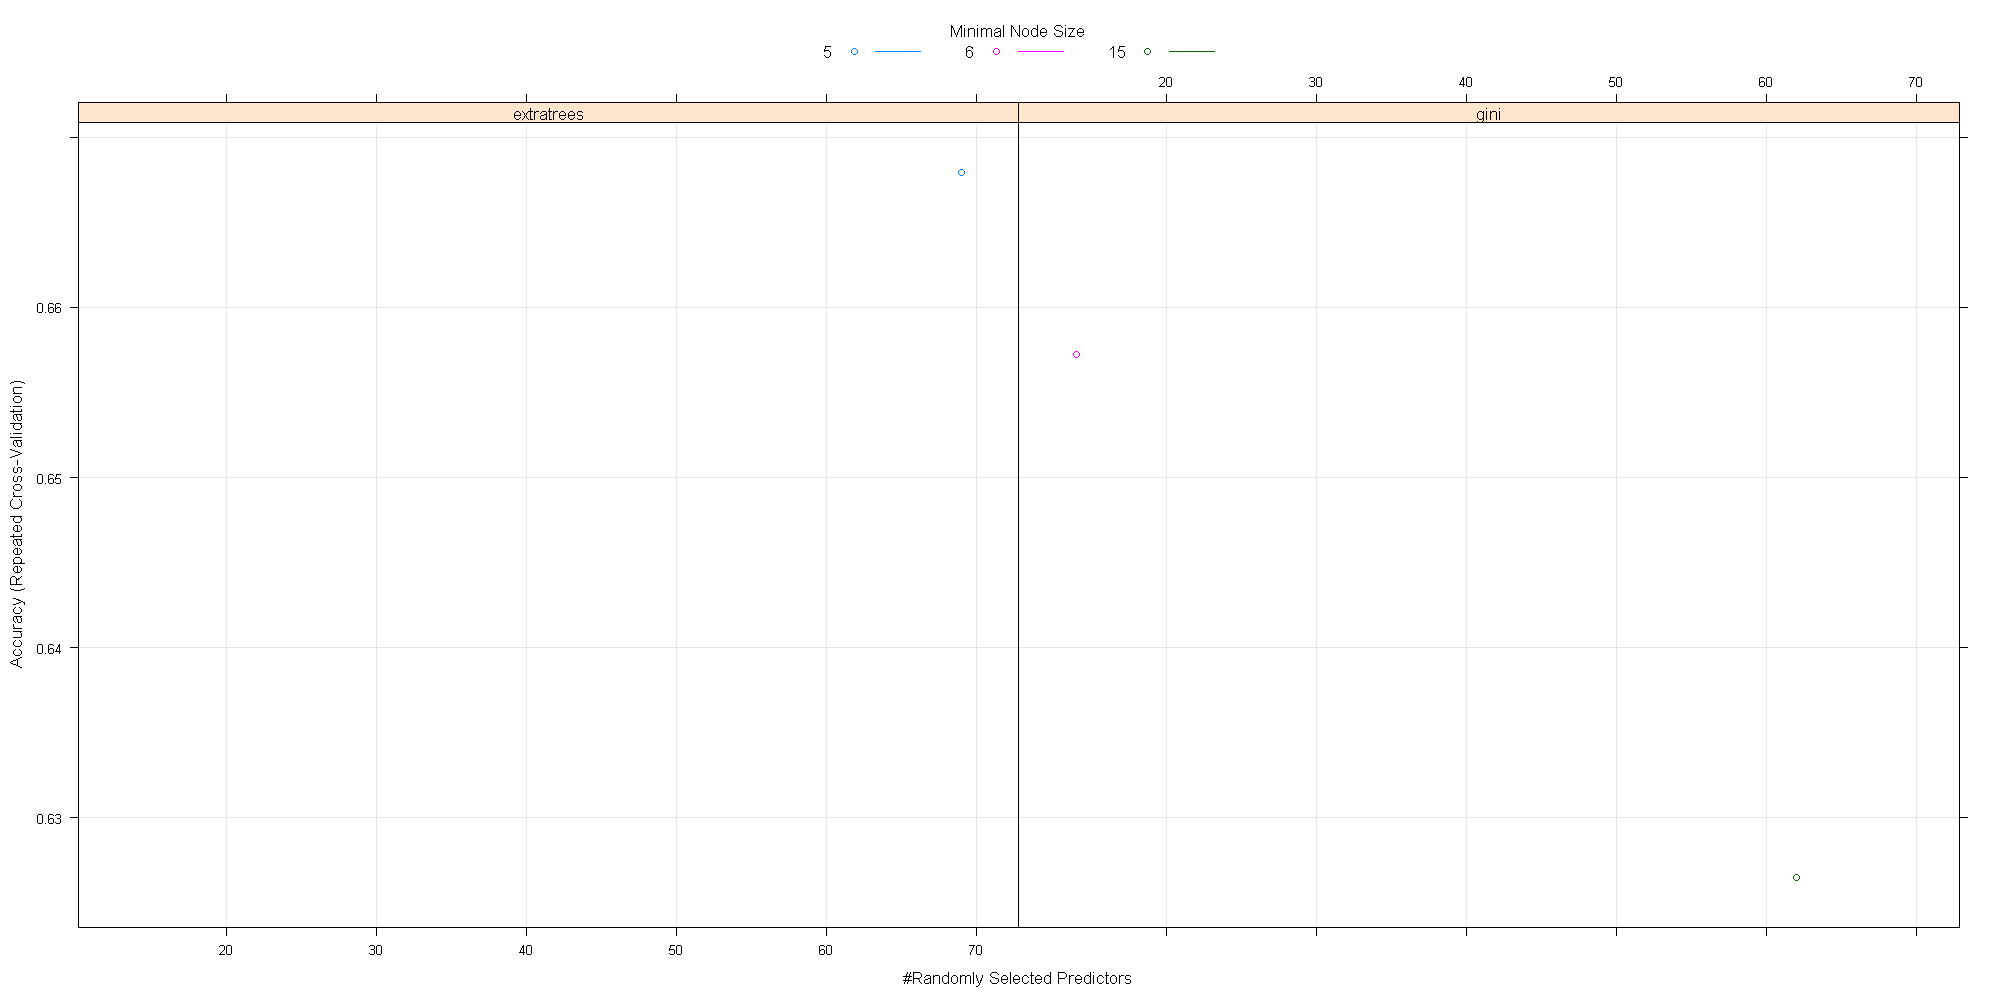

In [11]:
print(model_rf)
plot(model_rf)

Regularized Random Forest 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 673, 673, 673, 672, 672, 672, ... 
Resampling results across tuning parameters:

  mtry  coefReg    coefImp    Accuracy   Kappa    
  55    0.1918929  0.6430405  0.5848649  0.3772960
  67    0.9843026  0.9699676  0.5702342  0.3553191
  74    0.5399365  0.6340236  0.5635315  0.3452399

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 55, coefReg = 0.1918929
 and coefImp = 0.6430405.


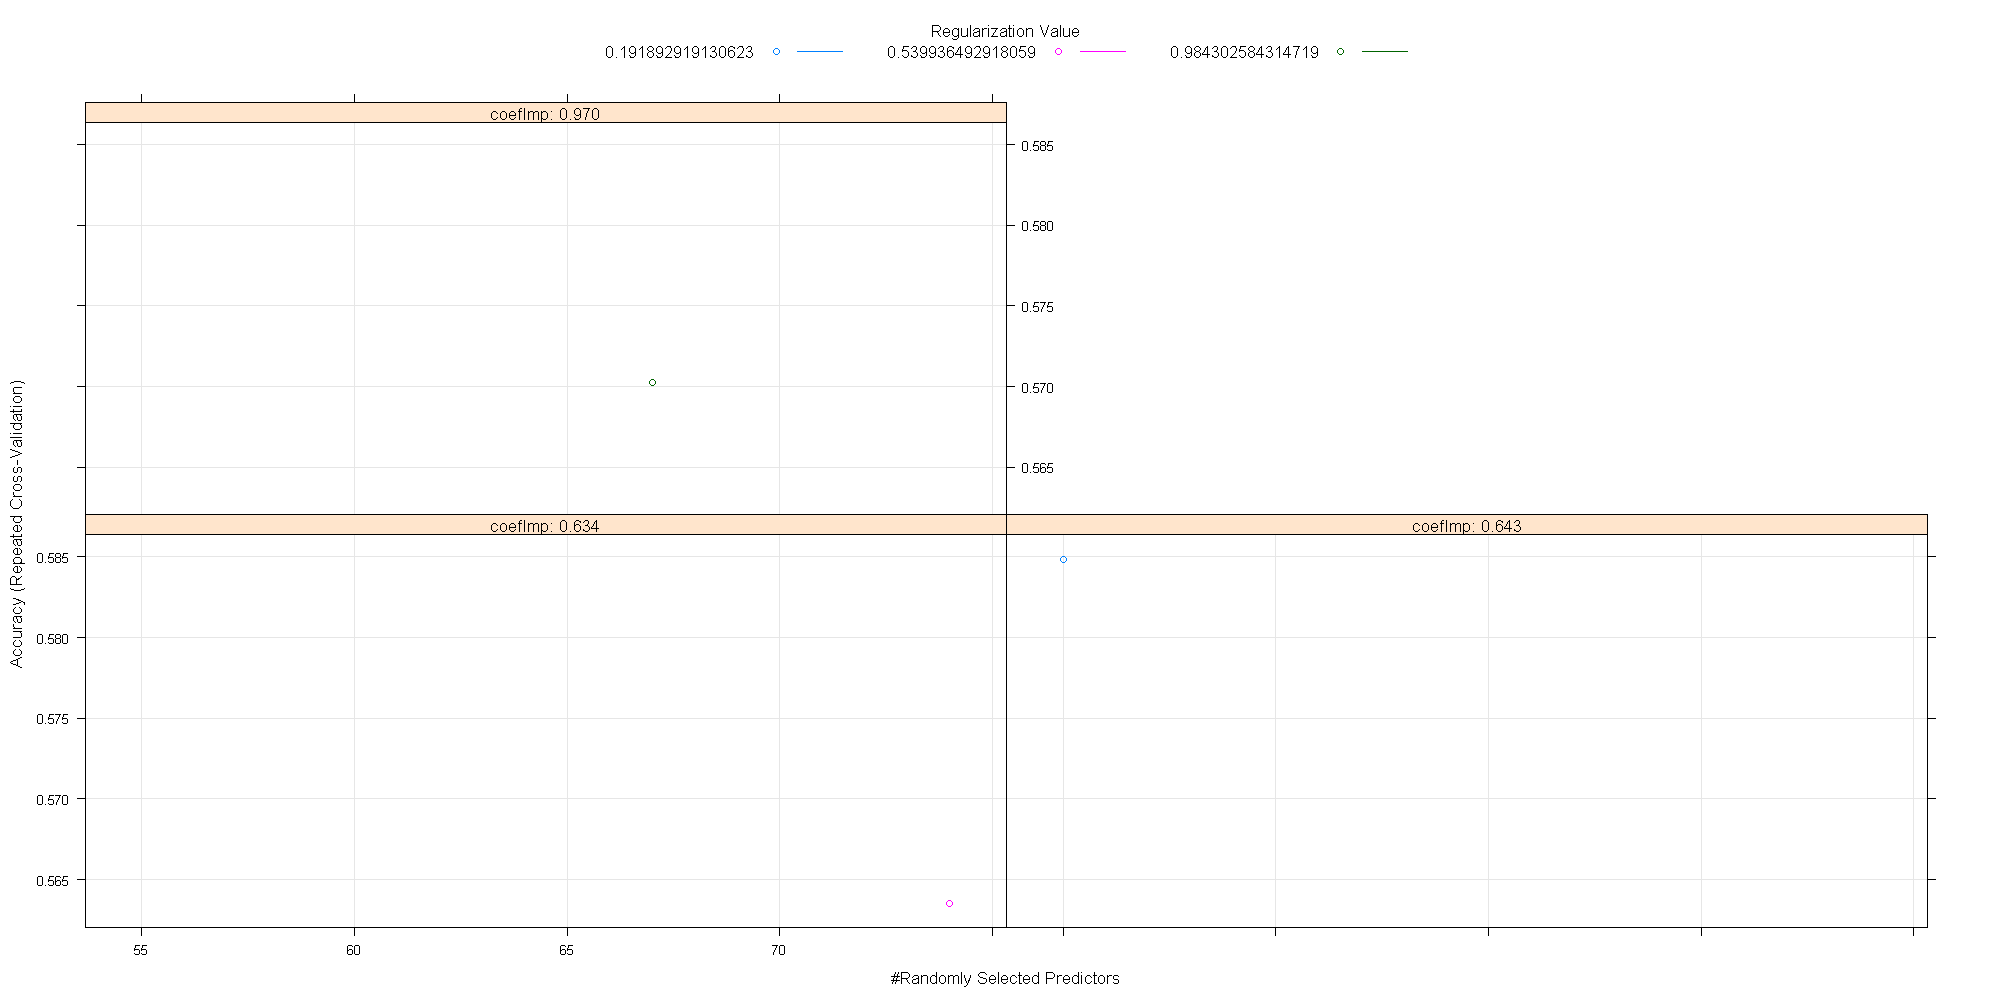

In [12]:
print(model_rrf)
plot(model_rrf)


Call:
summary.resamples(object = results)

Models: ranger, rrf 
Number of resamples: 10 

Accuracy 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
ranger 0.6266667 0.6498198 0.6621622 0.6679640 0.7000000 0.7066667    0
rrf    0.4800000 0.5540541 0.5733333 0.5848649 0.6266667 0.6800000    0

Kappa 
       Min.   1st Qu.   Median     Mean 3rd Qu. Max. NA's
ranger 0.44 0.4751984 0.493636 0.502087    0.55 0.56    0
rrf    0.22 0.3307286 0.360000 0.377296    0.44 0.52    0


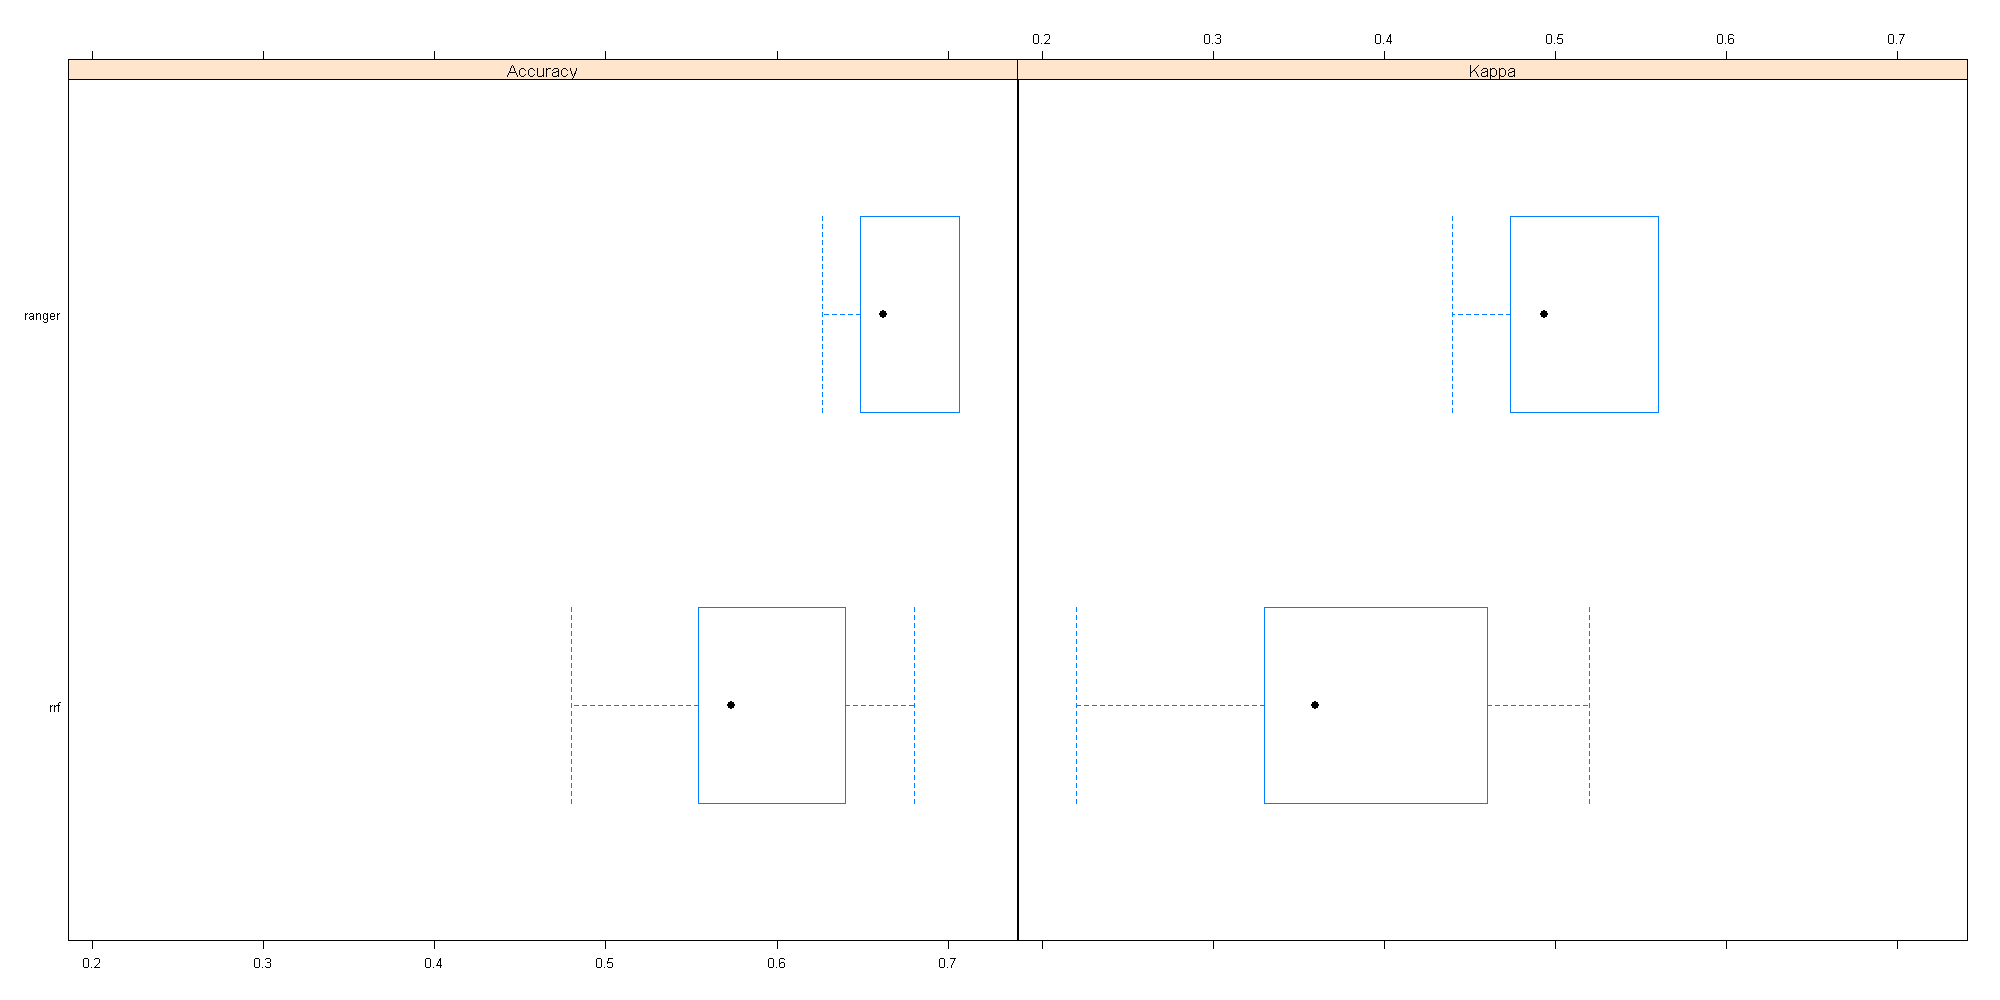

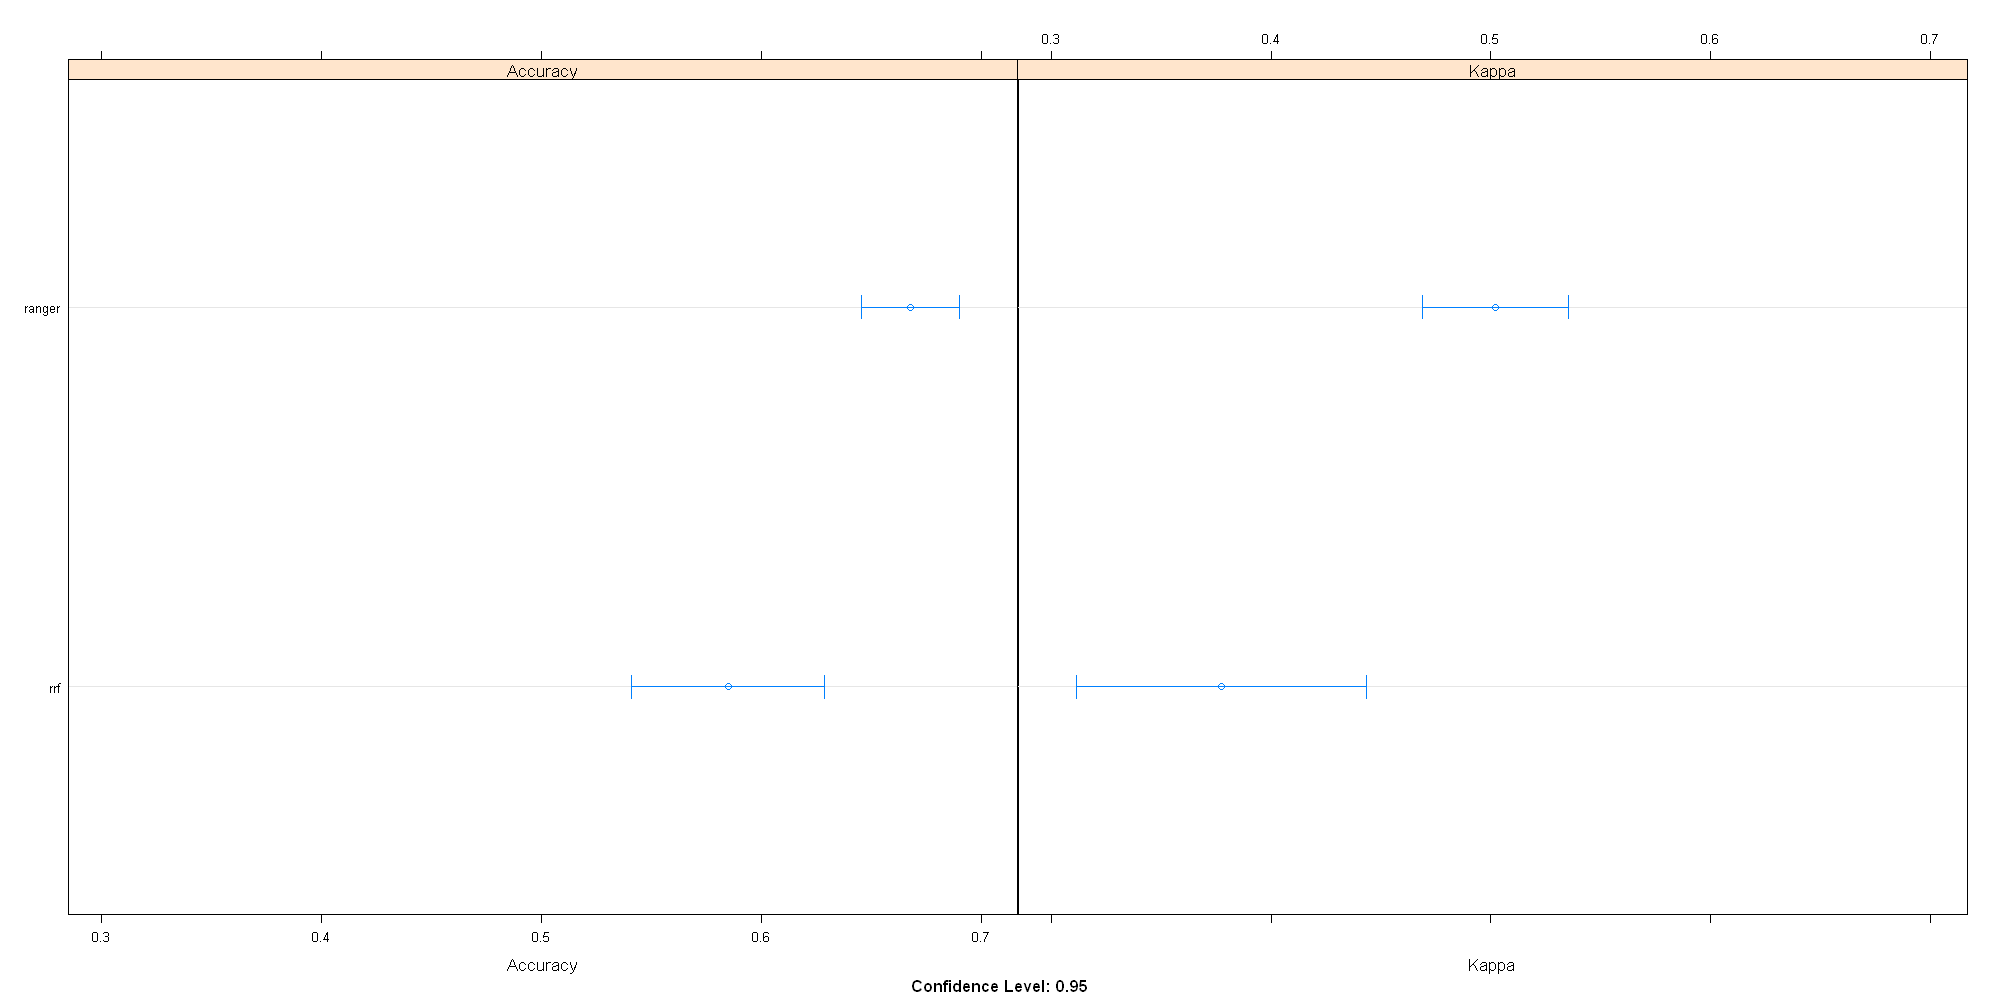

In [13]:
# collect resamples
results <- resamples(list(ranger=model_rf,rrf=model_rrf))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [16]:
pred_rf <- predict(model_rf,TestData)  # 53 acc
pred_rf.prob <- predict(model_rf,TestData, type="prob")


result <- confusionMatrix(TestClasses,  pred_rf) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile          72         52     32
  Complicato           30         83      9
  Ottimo               13          6     24

Overall Statistics
                                          
               Accuracy : 0.5576          
                 95% CI : (0.5014, 0.6128)
    No Information Rate : 0.4393          
    P-Value [Acc > NIR] : 1.348e-05       
                                          
                  Kappa : 0.2999          
                                          
 Mcnemar's Test P-Value : 0.002271        

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.6261            0.5887       0.36923
Specificity                      0.5922            0.7833       0.92578
Pos Pred Value                   0.4615            0.6803       0.55814
Neg Pred Value                   0.7394           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.6260870,0.5922330,0.4615385,0.7393939,0.4615385,0.6260870,0.5313653,0.3582555,0.22429907,0.4859813,0.6091600
Class: Complicato,0.5886525,0.7833333,0.6803279,0.7085427,0.6803279,0.5886525,0.6311787,0.4392523,0.25856698,0.3800623,0.6859929
Class: Ottimo,0.3692308,0.9257812,0.5581395,0.8525180,0.5581395,0.3692308,0.4444444,0.2024922,0.07476636,0.1339564,0.6475060


In [15]:
roc_model_rf <- multiclass.roc(TestClasses, as.numeric(pred_rf))
roc_model_rf


Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases




Call:
multiclass.roc.default(response = TestClasses, predictor = as.numeric(pred_rf))

Data: as.numeric(pred_rf) with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.6217

percent,FALSE,FALSE
sensitivities,"1.0000000, 0.6976744, 0.5581395, 0.0000000","1.0000000, 0.6976744, 0.5581395, 0.0000000"
specificities,"0.0000000, 0.4615385, 0.7948718, 1.0000000","0.0000000, 0.2459016, 0.9262295, 1.0000000"
thresholds,"-Inf, 1.5, 2.5, Inf","-Inf, 1.5, 2.5, Inf"
direction,<,<
cases,"3, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3","3, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3"
controls,"3, 2, 1, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 3, 1, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 3, 2, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1","1, 2, 2, 2, 3, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1"
fun.sesp,"function (thresholds, controls, cases, direction) , {, ncontrols <- length(controls), ncases <- length(cases), predictor <- c(controls, cases), response <- c(rep(0, length(controls)), rep(1, length(cases))), decr <- direction == ""<"", predictor.order <- order(predictor, decreasing = decr), predictor.sorted <- predictor[predictor.order], response.sorted <- response[predictor.order], tp <- cumsum(response.sorted == 1), fp <- cumsum(response.sorted == 0), se <- tp/ncases, sp <- (ncontrols - fp)/ncontrols, dups.pred <- rev(duplicated(rev(predictor.sorted))), dups.sesp <- duplicated(se) & duplicated(sp), dups <- dups.pred | dups.sesp, if (sum(!dups) != length(thresholds) - 1) {, sessionInfo <- sessionInfo(), save(thresholds, controls, cases, direction, sessionInfo, , file = ""pROC_bug.RData""), stop(sprintf(""pROC: fast algorithm computed an incorrect number of sensitivities and specificities. Diagnostic data saved in pROC_bug.RData. Please report this bug to <%s>."", , utils::packageDescription(""pROC"")$BugReports)), }, if (direction == ""<"") {, se <- rev(c(0, se[!dups])), sp <- rev(c(1, sp[!dups])), }, else {, se <- c(0, se[!dups]), sp <- c(1, sp[!dups]), }, return(list(se = se, sp = sp)), }","function (thresholds, controls, cases, direction) , {, ncontrols <- length(controls), ncases <- length(cases), predictor <- c(controls, cases), response <- c(rep(0, length(controls)), rep(1, length(cases))), decr <- direction == ""<"", predictor.order <- order(predictor, decreasing = decr), predictor.sorted <- predictor[predictor.order], response.sorted <- response[predictor.order], tp <- cumsum(response.sorted == 1), fp <- cumsum(response.sorted == 0), se <- tp/ncases, sp <- (ncontrols - fp)/ncontrols, dups.pred <- rev(duplicated(rev(predictor.sorted))), dups.sesp <- duplicated(se) & duplicated(sp), dups <- dups.pred | dups.sesp, if (sum(!dups) != length(thresholds) - 1) {, sessionInfo <- sessionInfo(), save(thresholds, controls, cases, direction, sessionInfo, , file = ""pROC_bug.RData""), stop(sprintf(""pROC: fast algorithm computed an incorrect number of sensitivities and specificities. Diagnostic data saved in pROC_bug.RData. Please report this bug to <%s>."", , utils::packageDescription(""pROC"")$BugReports)), }, if (direction == ""<"") {, se <- rev(c(0, se[!dups])), sp <- rev(c(1, sp[!dups])), }, else {, se <- c(0, se[!dups]), sp <- c(1, sp[!dups]), }, return(list(se = se, sp = sp)), }"
call,"roc.default(response = response, predictor = predictor, levels = X, , percent = percent, direction = ..1, auc = FALSE, ci = FALSE)","roc.default(respon

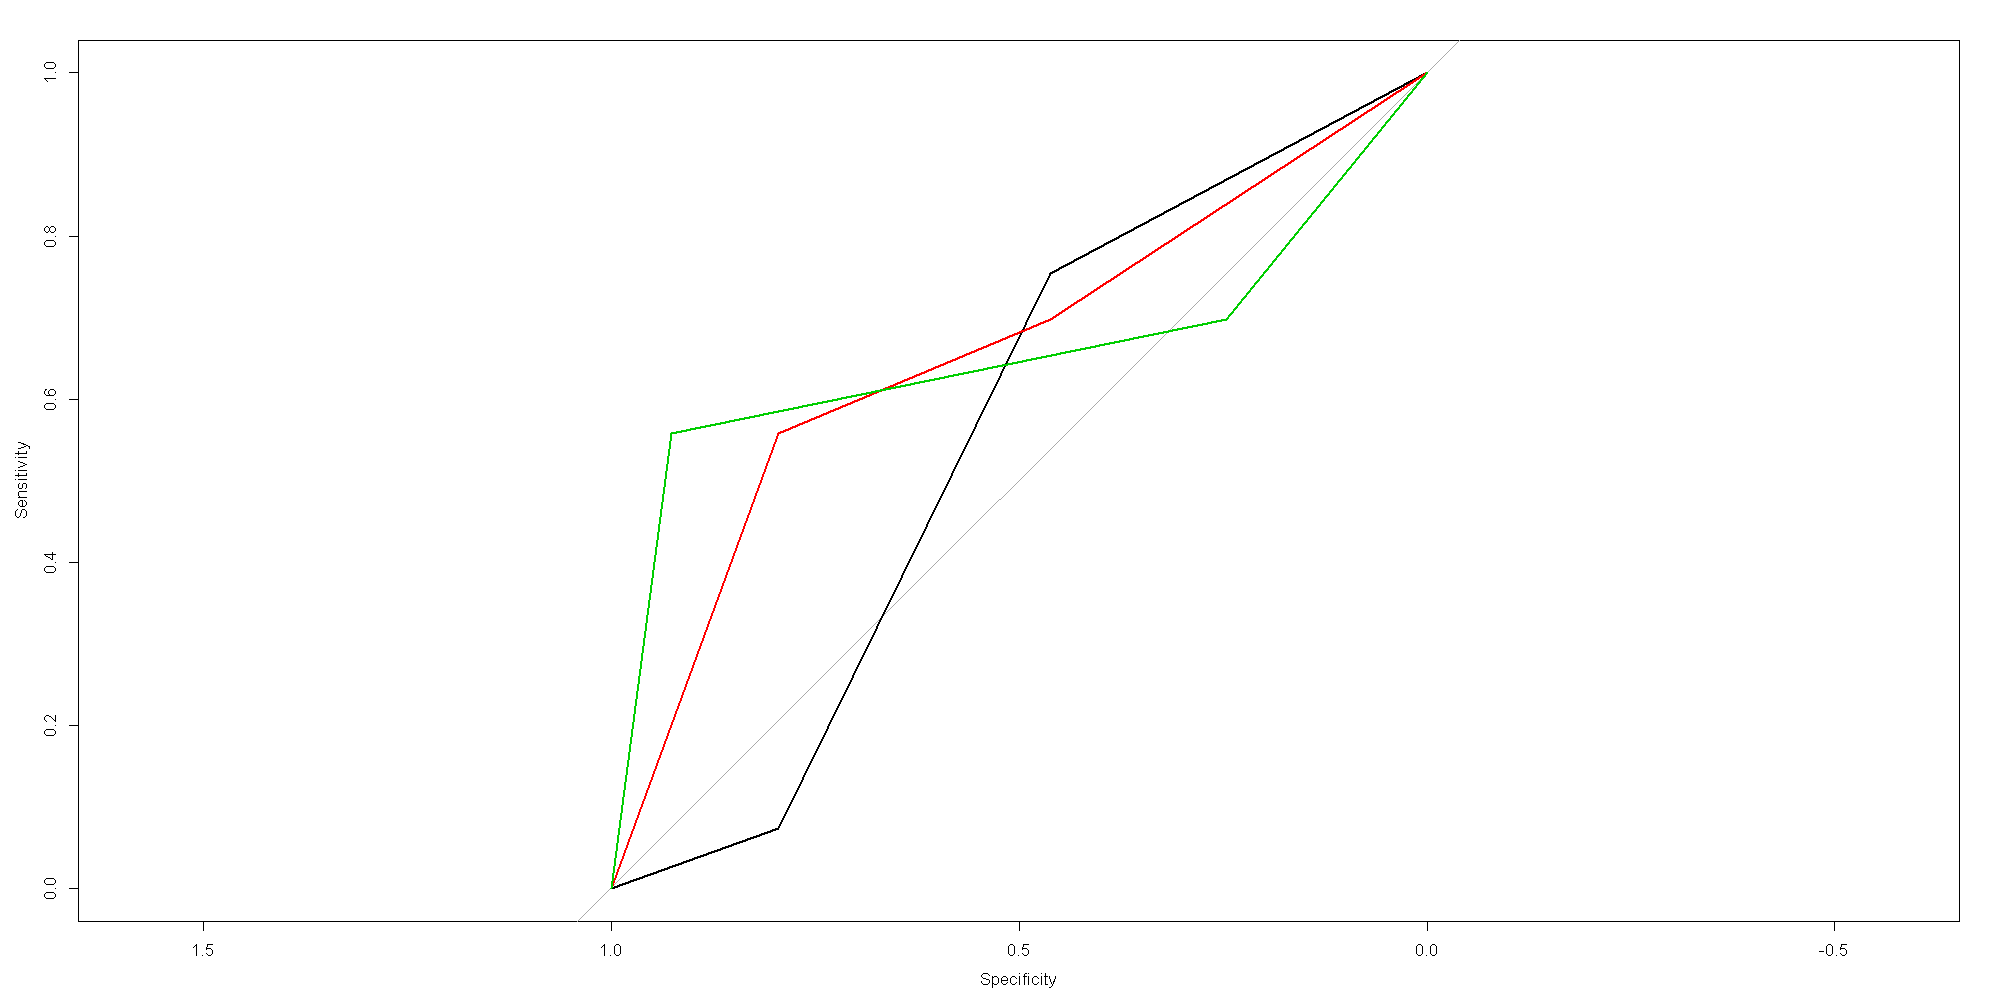

In [17]:
rs <- roc_model_rf[['rocs']]
plot.roc(rs[[1]])
sapply(2:length(rs),function(i) lines.roc(rs[[i]],col=i))

In [16]:
pred_rf.prob

Accettabile,Complicato,Ottimo
0.2915667,0.14853333,0.55990000
0.3448667,0.61843333,0.03670000
0.6136667,0.29110000,0.09523333
0.6230667,0.31656667,0.06036667
0.4294000,0.52203333,0.04856667
0.3625667,0.43266667,0.20476667
0.4416667,0.06430000,0.49403333
0.4394667,0.12243333,0.43810000
0.2501000,0.05036667,0.69953333
0.3196333,0.63856667,0.04180000
